### 4.10 Part5 MHS
#### 1 Importing libraries and df w/o PI
#### 2 analyzing Mature High Spender by Loyalty Flag
#### 3 -analyzing Mature High Spender purshease by  sales amount
#### 4 -analyzing Mature High Spender by Busiest_day
#### Analyzing by prefered hour of day
#### 6 Analyzing number of Mature High Spender by State
#### 7 Analyzing Mature High Spenders  by n_dependants
#### 8 Days since prior order
####  9  Defining TOP products for client group


### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

#### -importing df

In [3]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','MHS.pkl'))

In [4]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag',
       'AgeIncome_flag'],
      dtype='object')

In [5]:
df.shape

(396050, 31)

In [6]:
df[['user_id','Age', 'income','product_id', 'median_days_sinse_ord','order_number','mean_price']] .describe()

,user_id,Age,income,product_id,median_days_sinse_ord,order_number,mean_price
count,396050.000000,396050.000000,396050.000000,396050.000000,396050.000000,396050.000000,396050.000000
mean,103498.919010,60.714319,233139.421515,25012.039624,8.999710,18.686315,212.374056
std,59431.583705,11.999570,118555.269511,14423.790424,5.876693,18.203368,491.762227
min,85.000000,41.000000,61629.000000,0.000000,0.000000,1.000000,10.000000
25%,53303.000000,49.000000,142816.000000,12919.000000,5.000000,6.000000,35.765428
50%,102256.000000,61.000000,212949.000000,24852.000000,7.000000,13.000000,84.613542
75%,154307.000000,71.000000,284359.000000,37449.000000,11.000000,26.000000,195.139359
max,206008.000000,81.000000,593901.000000,49688.000000,30.000000,100.000000,15006.940000


### 2 Analyzing Mature High Spender by Loyalty Flag

#### --creating the subset to avoid Memory Error

In [7]:
df1=df[['user_id','Gender','fam_status','STATE','department_id', 'product_id', 'product_name', 
       'busiest_day','loyalty_flag','AgeIncome_flag','prices','income']]

### - How many customers are MHS?

In [8]:
df1[['user_id']].drop_duplicates().shape

(2413, 1)

### 3 -Analyzing Mature High Spender by Loyalty Flag and Family Status

#### -creating subset with unique user_id

In [9]:
df1=df[['user_id','fam_status','loyalty_flag']].drop_duplicates()

In [10]:
df1.groupby('fam_status')['loyalty_flag'].value_counts()

fam_status        loyalty_flag    
divorced/widowed  Regular customer    153
                  New customer        121
                  Loyal customer       30
married           Regular customer    874
                  New customer        737
                  Loyal customer      186
single            New customer        138
                  Regular customer    136
                  Loyal customer       38
Name: loyalty_flag, dtype: int64

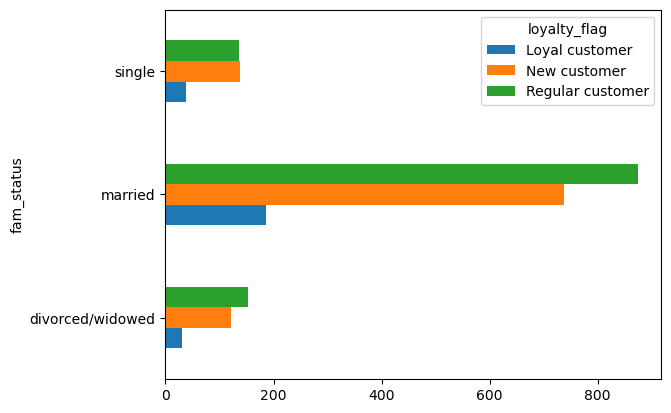

In [11]:
bar12=df1.groupby('fam_status')['loyalty_flag'].value_counts().unstack().plot.barh()

In [12]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'MHS_LoyaltyFlag.png'))

### 3 -analyzing Mature High Spender purshease by  sales amount

In [19]:
Df1=df[['user_id','prices','loyalty_flag']]

In [23]:
Df1

,user_id,prices,loyalty_flag
1522,117740,3.2,Loyal customer
1523,117740,13.5,Loyal customer
1524,117740,1.6,Loyal customer
1525,117740,12.3,Loyal customer
1526,117740,6.4,Loyal customer
...,...,...,...
10907279,56006,11.7,New customer
10907280,56006,11.7,New customer
10907308,57909,12.4,New customer
10907309,57909,0.0,New customer


In [20]:
df11=Df1.groupby('loyalty_flag')['prices'].sum()

In [21]:
df11

loyalty_flag
Loyal customer      18392041.5
New customer        13656990.4
Regular customer    51565899.8
Name: prices, dtype: float64

#### -creating and saving plot

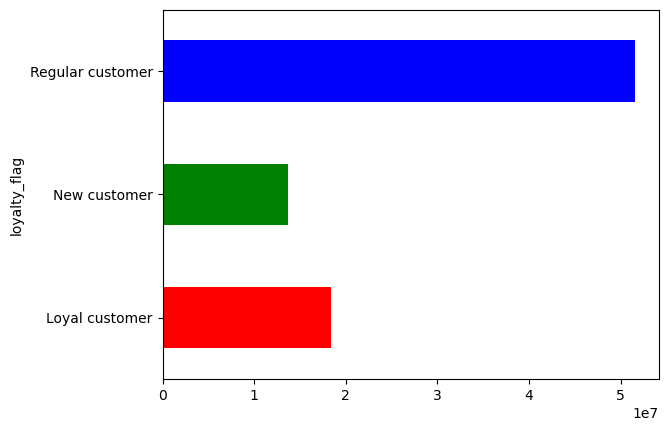

In [22]:
bar22=Df1.groupby('loyalty_flag')['prices'].sum().plot.barh(color=['red', 'green','blue'])

In [24]:
bar22.figure.savefig(os.path.join(path, 'Prepared Data', 'MHS_LoyaltyFlagPrices.png'))

### 4 -analyzing Mature High Spender by Busiest_day

In [25]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [26]:
df4

,user_id,STATE,busiest_day,day_of_week
1522,117740,Oregon,Slowest days,4
1523,117740,Oregon,Regularly days,5
1524,117740,Oregon,Slowest days,3
1525,117740,Oregon,Regularly days,2
1526,117740,Oregon,Regularly days,5
...,...,...,...,...
10907279,56006,Delaware,Slowest days,4
10907280,56006,Delaware,Slowest days,4
10907308,57909,New Hampshire,Regularly days,5
10907309,57909,New Hampshire,Regularly days,6


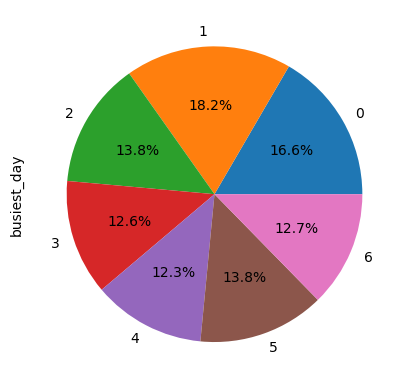

In [27]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [28]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'MHS_BusiestDayOfWeek.png'))

In [29]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    65777
1    72019
2    54576
3    49943
4    48691
5    54843
6    50201
Name: busiest_day, dtype: int64

### 5 Analyzing by prefered hour of day

In [30]:
df44=df[['order_hour_of_day','user_id']]

In [31]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      1995
1      1411
2      1294
3       807
4       936
5      1362
6      5029
7     11934
8     19648
9     30167
10    34505
11    34561
12    32141
13    31471
14    32197
15    34767
16    30924
17    26980
18    20469
19    15055
20    11121
21     7966
22     5526
23     3784
Name: user_id, dtype: int64

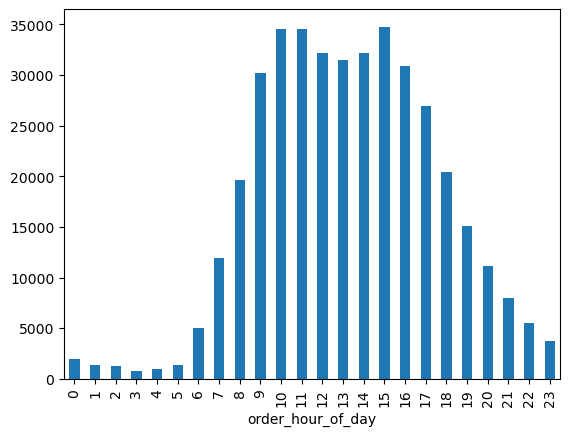

In [32]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [33]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'MHS_BusiestHourOfDay.png'))

### 6 Analyzing number of Mature High Spender by State

In [34]:
df5=df[['user_id','STATE']]

In [35]:
DF5=df5.drop_duplicates().reset_index()

In [36]:
DF5

,index,user_id,STATE
0,1522,117740,Oregon
1,2910,31590,Montana
2,4050,47548,Iowa
3,9889,2823,Kentucky
4,15258,100191,New York
...,...,...,...
2408,3434585,176485,New Jersey
2409,5262389,82751,North Dakota
2410,6687459,15227,North Dakota
2411,10743455,115493,North Dakota


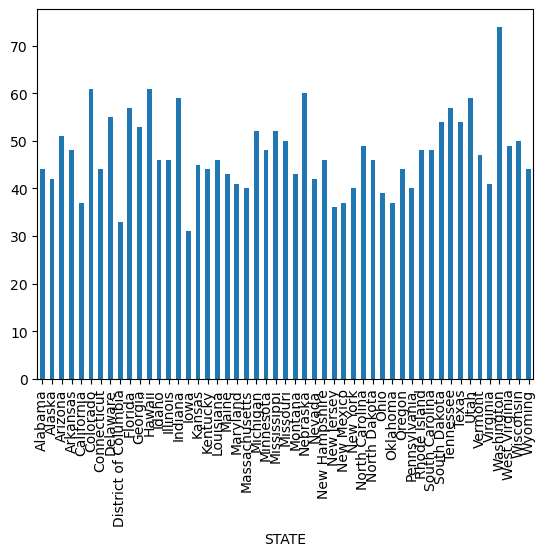

In [37]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [38]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                 44
Alaska                  42
Arizona                 51
Arkansas                48
California              37
Colorado                61
Connecticut             44
Delaware                55
District of Columbia    33
Florida                 57
Georgia                 53
Hawaii                  61
Idaho                   46
Illinois                46
Indiana                 59
Iowa                    31
Kansas                  45
Kentucky                44
Louisiana               46
Maine                   43
Maryland                41
Massachusetts           40
Michigan                52
Minnesota               48
Mississippi             52
Missouri                50
Montana                 43
Nebraska                60
Nevada                  42
New Hampshire           46
New Jersey              36
New Mexico              37
New York                40
North Carolina          49
North Dakota            46
Ohio                    39
Oklahoma              

In [39]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'MHS_UsersNumberState.png'))

### 7 Analyzing Mature High Spenders  by n_dependants

In [40]:
df6=df[['user_id', 'n_dependants']]

In [41]:
DF6=df6.drop_duplicates()

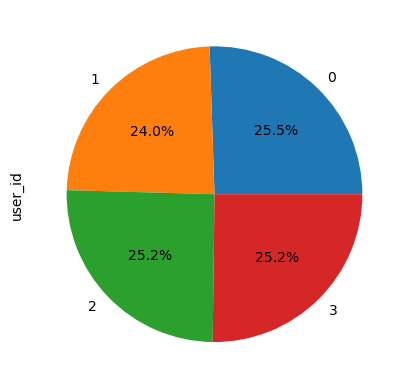

In [42]:
pie16=df6.groupby(['n_dependants'])['user_id'].nunique().plot(kind='pie', autopct='%0.01f%%')

In [43]:
df6

,user_id,n_dependants
1522,117740,1
1523,117740,1
1524,117740,1
1525,117740,1
1526,117740,1
...,...,...
10907279,56006,0
10907280,56006,0
10907308,57909,3
10907309,57909,3


In [44]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'MHS_NDependansUsers.png'))

In [45]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    616
1    580
2    609
3    608
Name: user_id, dtype: int64

### 8 Days since prior order

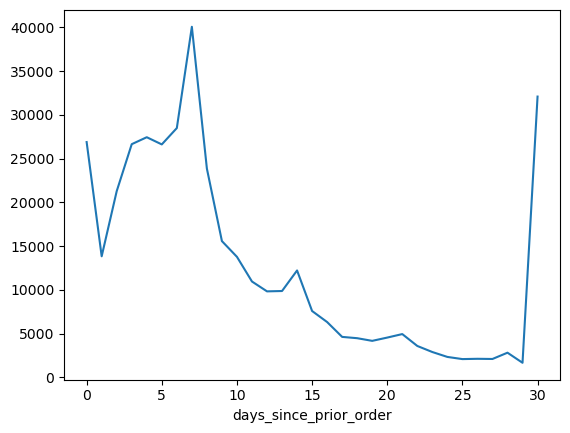

In [46]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [47]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0     26904
1     13845
2     21289
3     26662
4     27457
5     26635
6     28503
7     40081
8     23872
9     15584
10    13785
11    10964
12     9838
13     9878
14    12228
15     7592
16     6331
17     4634
18     4485
19     4181
20     4556
21     4956
22     3597
23     2905
24     2344
25     2097
26     2130
27     2110
28     2828
29     1675
30    32104
Name: days_since_prior_order, dtype: int64

In [48]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'MHS_DaysSincePriorOrder.png'))

### 9  Defining TOP products for client group


 #### creating subset

In [49]:
df18=df[['product_name','product_id','prices']]

In [50]:
df18

,product_name,product_id,prices
1522,Copper Coated Scrubbing Pads,2494,3.2
1523,Whole Milk,4210,13.5
1524,Eggo Chocolate Chip Waffles,6052,1.6
1525,Tomato Ketchup,7751,12.3
1526,Napa Cabbage,11526,6.4
...,...,...,...
10907279,Smoked Whitefish Salad,5351,11.7
10907280,Smoked Whitefish Salad,5351,11.7
10907308,Organic Ezekiel 49 Bread Cinnamon Raisin,32665,12.4
10907309,,0,0.0


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [51]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().drop(index=2).head(10)

In [52]:
DF18

,product_name,prices
0,Banana,5524
1,Bag of Organic Bananas,3368
3,Lowfat 2% Milkfat Cottage Cheese,2718
4,Large Lemon,1551
5,Limes,1525
6,2% Reduced Fat Milk,1393
7,Blueberries,1385
8,Organic Avocado,1266
9,Small Hass Avocado,1137
10,Organic Strawberries,1134


In [53]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [54]:
DF18

,product_name,count_orders
0,Banana,5524
1,Bag of Organic Bananas,3368
3,Lowfat 2% Milkfat Cottage Cheese,2718
4,Large Lemon,1551
5,Limes,1525
6,2% Reduced Fat Milk,1393
7,Blueberries,1385
8,Organic Avocado,1266
9,Small Hass Avocado,1137
10,Organic Strawberries,1134


#### -creating plot

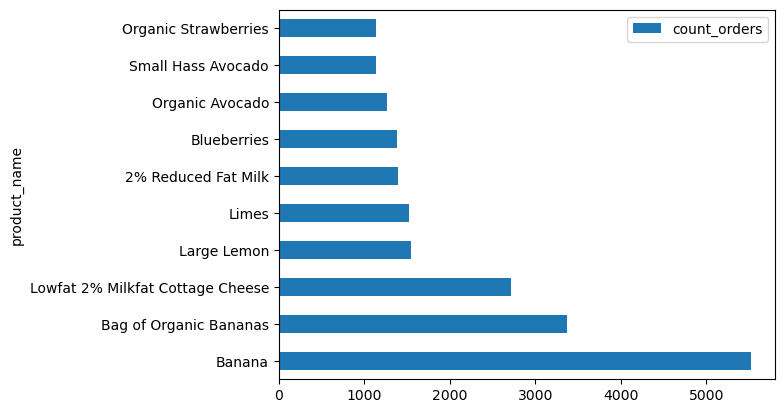

In [55]:
Bar21=DF18.plot.barh(x='product_name')

In [56]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'MHS_Products.png'))

#### droping duplicates

In [62]:
df19=df18.drop_duplicates()

In [63]:
df19

,product_name,product_id,prices
1522,Copper Coated Scrubbing Pads,2494,16.0
1523,Whole Milk,4210,13081.5
1524,Eggo Chocolate Chip Waffles,6052,260.8
1525,Tomato Ketchup,7751,3628.5
1526,Napa Cabbage,11526,281.6
...,...,...,...
10904757,Organic Grass Fed Whey Protein Unflavored,2085,14.6
10905913,Cold Pressed Flax Oil,42543,11.7
10906752,Organic Raisins,20448,5.4
10906822,Vanilla Non Dairy Frozen Dessert Minis,23586,12.5


#### sorting by descending order to see MHS TOP products

In [65]:
df19.loc[df19['prices']>=1000].sort_values(by='prices', ascending=False).head(10)

,product_name,product_id,prices
9913,Lowfat 2% Milkfat Cottage Cheese,21553,40498200.0
227237,2 % Reduced Fat Milk,33664,39899601.0
1630,Banana,24852,67945.2
1621,Bag of Organic Bananas,13176,34690.4
1663,Limes,26209,22417.5
44314,Large Lemon,47626,21714.0
2970,Blueberries,9076,14681.0
93713,Asparagus,46979,13084.5
1523,Whole Milk,4210,13081.5
9892,2% Reduced Fat Milk,23909,12815.6
